**Считывание обучающей выборки**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/train.csv"
df_train = pd.read_csv(DATA_PATH)
df_train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,0.151985,2.0,1.0,0.168542,0.0,Education,0.0,23.0,5.0,2539.0,247.0,50072.0,15005.0,5569.083333,0.908289,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,0.175693,3.0,0.0,0.141553,0.0,Home,0.0,27.0,11.0,844.0,694.0,91878.0,64877.0,14345.583333,0.797339,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,0.444605,3.0,0.0,0.030987,1.0,Education,0.0,21.0,12.0,12756.0,651.0,292300.0,13918.0,25000.000000,0.915945,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,0.188452,7.0,0.0,0.379843,0.0,Debt Consolidation,0.0,27.0,21.0,1524.0,529.0,13070.0,3846.0,2890.250000,0.876416,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,0.273431,3.0,1.0,0.068659,0.0,Debt Consolidation,0.0,35.0,9.0,1973.0,128.0,33357.0,351603.0,25000.000000,0.888689,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


**Посмотрим на количесво пропусков**

In [61]:
print(df_train.isnull().sum())

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

**Перед тем, как убрать пропуски, разделим столбец "ApplicationDate" на день, месяц, и год**

In [62]:
df_train['ApplicationDate'] = pd.to_datetime(df_train['ApplicationDate'])
df_train['ApplicationDay'] = df_train['ApplicationDate'].dt.day
df_train['ApplicationMonth'] = df_train['ApplicationDate'].dt.month
df_train['ApplicationYear'] = df_train['ApplicationDate'].dt.year
df_train = df_train.drop('ApplicationDate', axis=1)

**Заполним данные в категориальных и числовых признаках модой и среднем значением соответственно**

In [63]:
categorical_features = df_train.select_dtypes(exclude=['int64', 'float64']).columns
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns

# Заполнение в категориальных признаках модой
for feature in categorical_features:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mode()[0])

# Заполнение в числовых признаках средним значением
for feature in numeric_features:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mean())

print(df_train.isnull().sum())

Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

**Чтобы работать с категориальными признаки, применим one-hot-encoding**

In [64]:
df_train = pd.get_dummies(df_train, columns=categorical_features) #one-hot-encoding
column_list = df_train.columns.tolist()
print(column_list)
df_train

['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'ApplicationDay', 'ApplicationMonth', 'ApplicationYear', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'HomeOwnershipStatus_Mortgage', 'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent', 'LoanPurpose_Auto', 'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'EmploymentStatu

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationDay,ApplicationMonth,ApplicationYear,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,27.000000,66829.000000,549.000000,17290.000000,60.000000,1.000000,1095.000000,0.151985,2.000000,1.000000,0.168542,0.000000,0.000000,23.000000,5.00000,2539.000000,247.000000,50072.000000,15005.000000,5569.083333,0.908289,4.000000,4.000000,35067.00000,0.257790,0.251465,508.970230,0.288013,0.000000,66.176500,26.000000,6.000000,2010.000000,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False
1,55.000000,172147.000000,850.000000,16110.000000,36.000000,1.000000,211.000000,0.175693,3.000000,0.000000,0.141553,0.000000,0.000000,27.000000,11.00000,844.000000,694.000000,91878.000000,64877.000000,14345.583333,0.797339,2.000000,33.000000,27001.00000,0.086110,0.093173,514.675859,0.050585,1.000000,28.495737,23.000000,9.000000,1996.000000,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
2,51.000000,300000.000000,850.000000,38436.000000,36.000000,0.000000,546.000000,0.444605,3.000000,0.000000,0.030987,1.000000,0.000000,21.000000,12.00000,12756.000000,651.000000,292300.000000,13918.000000,25000.000000,0.915945,3.000000,28.000000,278382.00000,0.108436,0.115443,1268.276385,0.072571,1.000000,34.488104,19.000000,1.000000,2015.000000,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
3,25.000000,34683.000000,847.000000,19186.000000,48.000000,0.000000,153.000000,0.188452,7.000000,0.000000,0.379843,0.000000,0.000000,27.000000,21.00000,1524.000000,529.000000,13070.000000,3846.000000,2890.250000,0.876416,3.000000,0.000000,9224.00000,0.100686,0.112822,498.505187,0.225415,1.000000,36.910753,12.000000,5.000000,1981.000000,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,55.000000,300000.000000,850.000000,30437.000000,48.000000,2.000000,562.000000,0.273431,3.000000,1.000000,0.068659,0.000000,0.000000,35.000000,9.00000,1973.000000,128.000000,33357.000000,351603.000000,25000.000000,0.888689,5.000000,31.000000,4502.00000,0.110437,0.089037,756.035156,0.052721,1.000000,31.347091,7.000000,5.000000,1995.000000,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,57.000000,300000.000000,850.000000,14756.000000,48.000000,2.000000,620.000000,0.477742,1.000000,3.000000,0.154680,0.000000,0.000000,26.000000,2.00000,2064.000000,798.000000,168225.000000,681.000000,25000.000000,0.786244,4.000000,38.000000,167544.00000,0.094756,0.106387,378.792448,0.039952,1.000000,32.440586,10.000000,7.000000,2010.000000,False,True,False,False,False,False,True,False,False,False,True,Fals

**Посмотрим на корреляцию признаков**

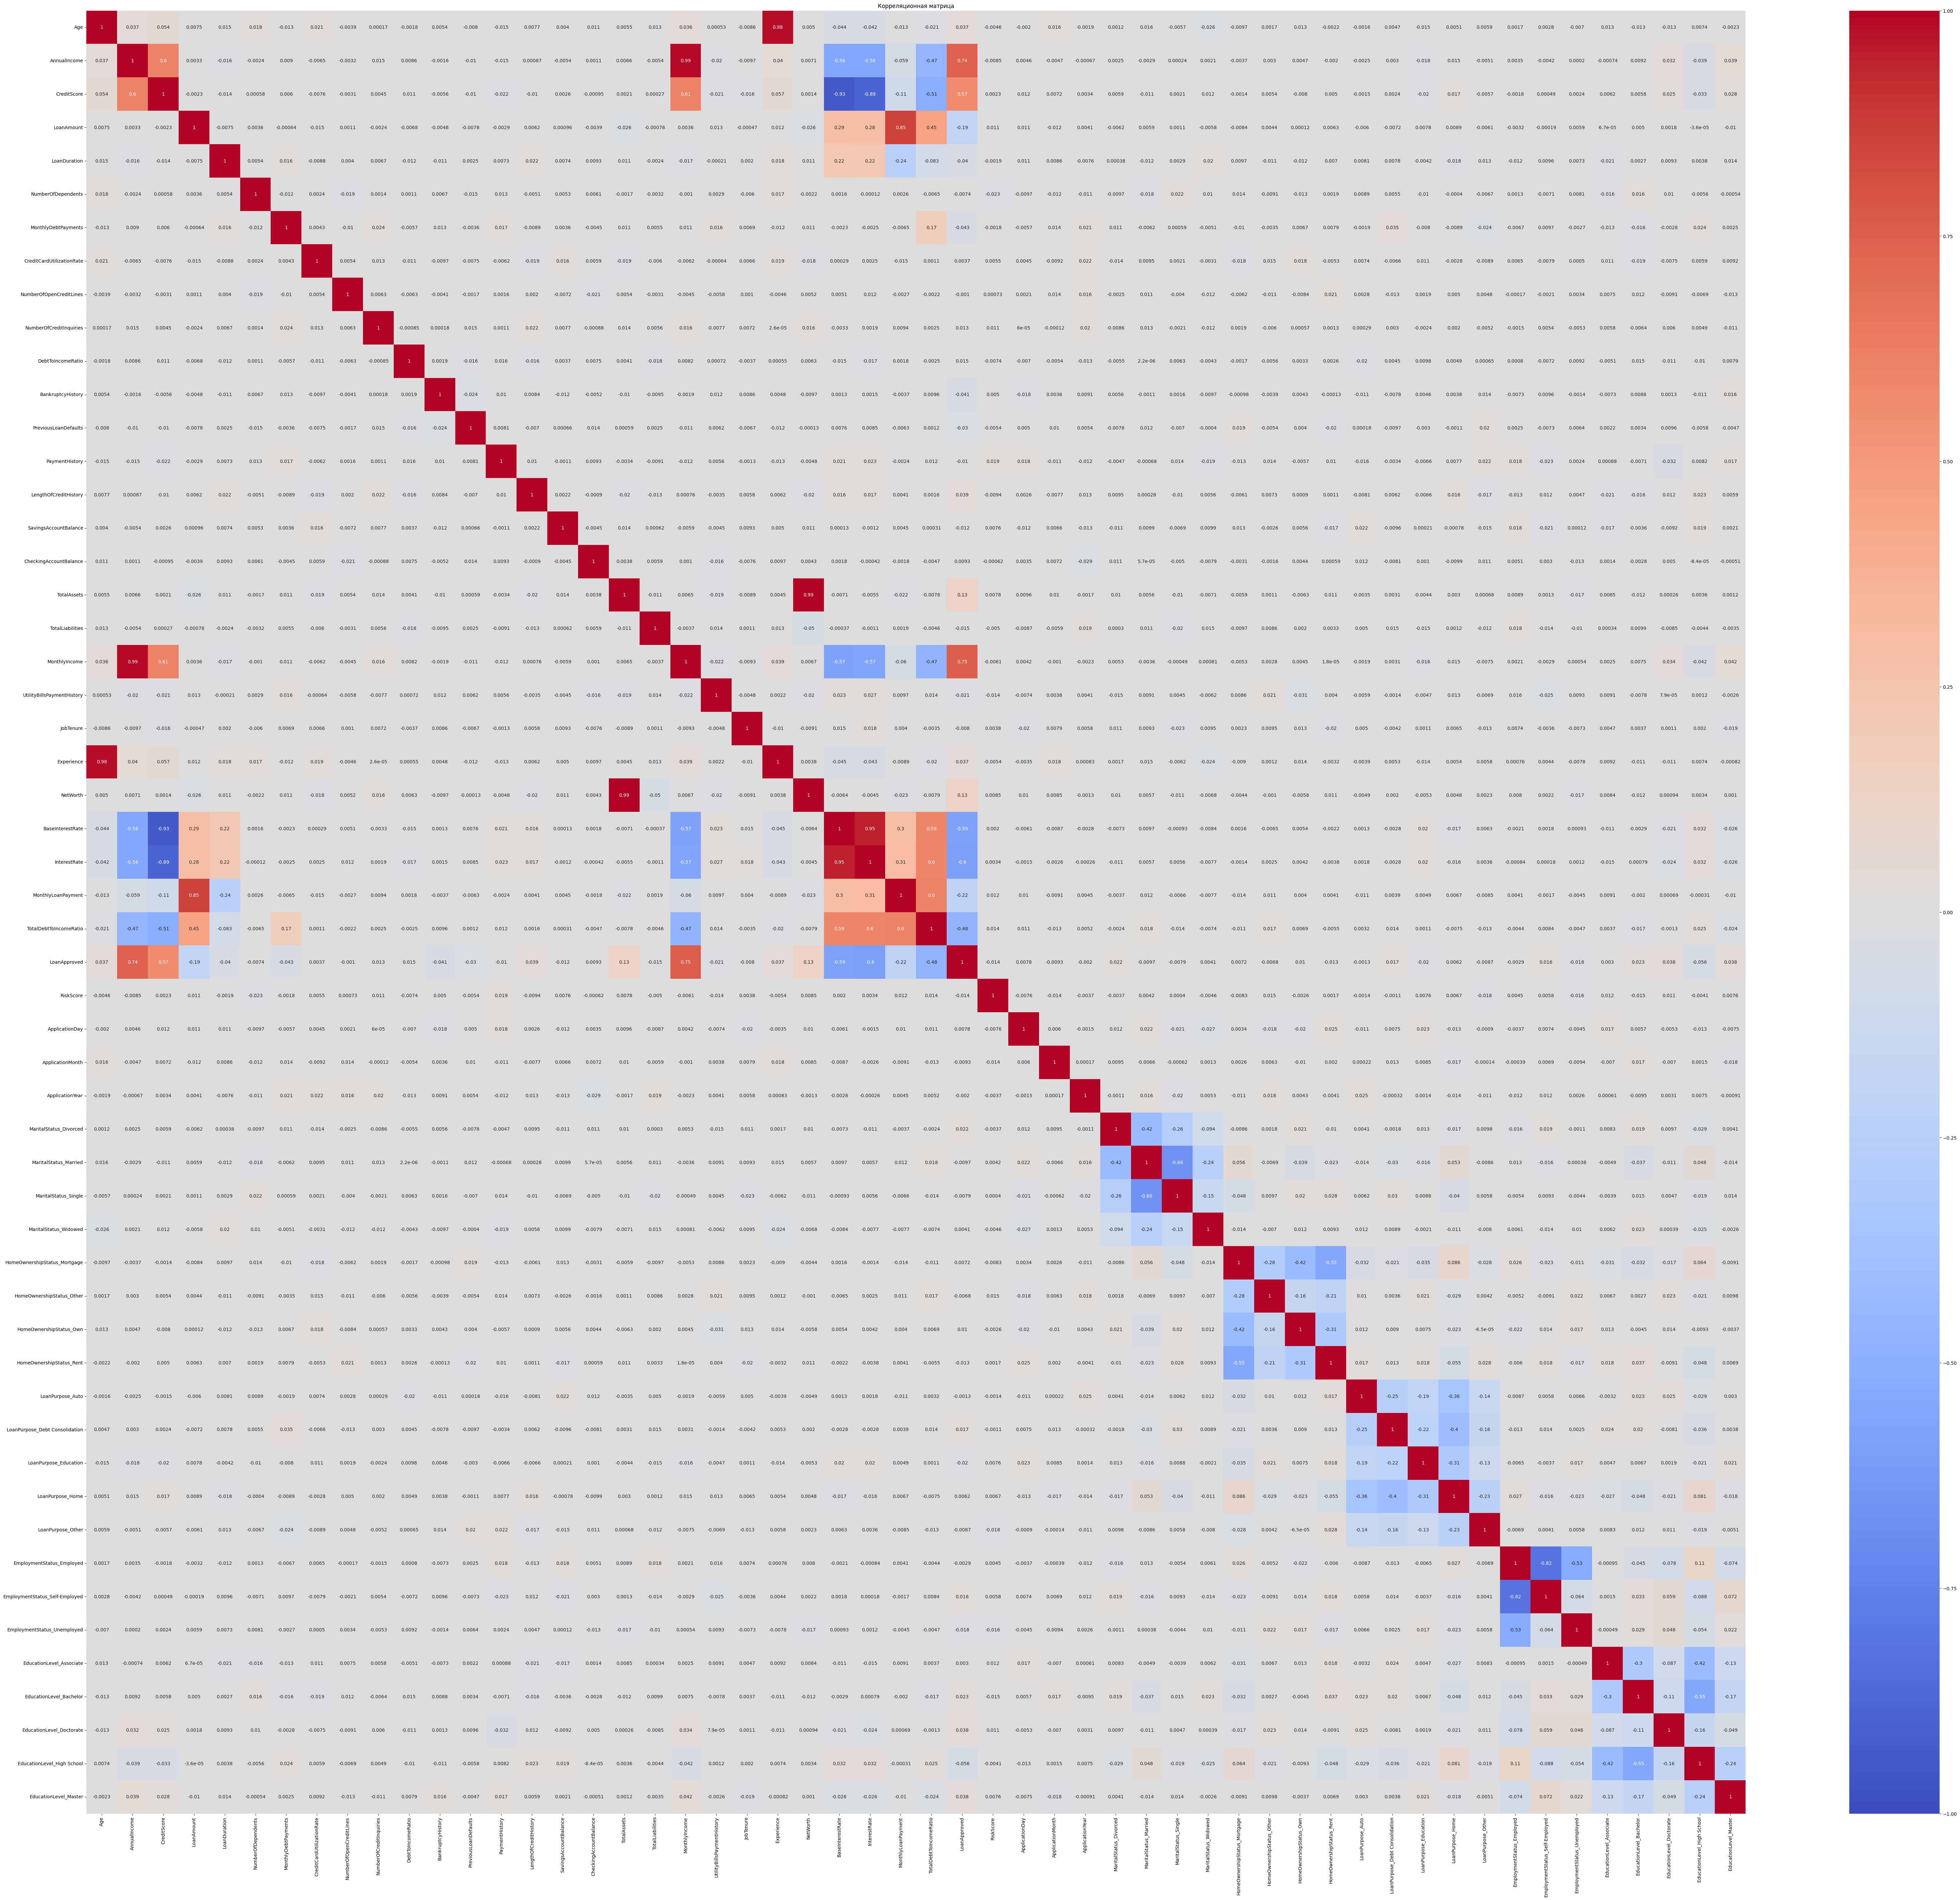

In [65]:
# Визуализация матрицы корреляций с помощью тепловой карты
corr_matrix = df_train.corr()
plt.figure(figsize=(80, 70))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

**Видим, что корреляция есть, но ее не так много. Посмотрим на корреляцию признаков только с target**

In [66]:
correlations_with_target = df_train.corr()['LoanApproved'].sort_values(ascending=False).drop('LoanApproved')
print(correlations_with_target)

MonthlyIncome                     0.754853
AnnualIncome                      0.743034
CreditScore                       0.567729
NetWorth                          0.126486
TotalAssets                       0.126077
LengthOfCreditHistory             0.038509
EducationLevel_Master             0.038018
EducationLevel_Doctorate          0.037608
Experience                        0.036699
Age                               0.036580
EducationLevel_Bachelor           0.023440
MaritalStatus_Divorced            0.021665
LoanPurpose_Debt Consolidation    0.016657
EmploymentStatus_Self-Employed    0.015812
DebtToIncomeRatio                 0.014922
NumberOfCreditInquiries           0.012520
HomeOwnershipStatus_Own           0.010433
CheckingAccountBalance            0.009273
ApplicationDay                    0.007770
HomeOwnershipStatus_Mortgage      0.007211
LoanPurpose_Home                  0.006186
MaritalStatus_Widowed             0.004116
CreditCardUtilizationRate         0.003731
EducationLe

**Создадим класс линейного классификатора**

In [91]:
import numpy as np

class MyClassifier:
    def __init__(self, model_type='linear', learning_rate=0.01, max_iterations=1000):
        self.model_type = model_type
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features, dtype=np.float64)
        self.bias = 0.0

        for _ in range(self.max_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._activation_function(linear_model)

            gradient_weights = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            gradient_bias = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_model)

    def _activation_function(self, x):
        if self.model_type == 'linear':
            return self._step_function(x)
        elif self.model_type == 'logistic':
            return self._sigmoid(x)
        else:
            raise ValueError("Неизвестный тип модели. Используйте 'linear' или 'logistic'.")

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def _sigmoid(self, x):
        x = np.clip(x, -709, 709)
        probabilities = 1 / (1 + np.exp(-x))
        return np.where(probabilities > 0.5, 1, 0)

**Подготовим тестовую выборку**

In [69]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
id_test = df_test['ID']
df_test = df_test.drop('ID', axis=1)
df_test

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,376,0.077124,2,0,0.438186,0,Auto,0,28,15,5008,619,5627,25585,17257.916667,0.883232,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,2006-04-10,28,64653,674,65491,48,Single,2,Own,238,0.073977,4,2,0.446233,0,Education,0,23,28,4590,710,317306,18282,5387.750000,0.791928,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2013-11-28,41,300000,768,16811,60,Single,1,Own,469,0.331499,5,0,0.035313,0,Auto,0,23,9,2429,623,13115,6136,25000.000000,0.805826,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,567,0.544696,2,1,0.278922,0,Education,0,24,9,14571,10749,25320,93806,25000.000000,0.829294,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,106,0.436103,0,0,0.196376,0,Home,0,14,6,930,2926,439068,2852,25000.000000,0.735013,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1993-03-19,40,300000,850,12696,60,Married,1,Other,434,0.062521,5,1,0.407260,0,Home,0,31,12,1487,1557,21046,10089,25000.000000,0.914606,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,2015-09-27,39,75014,572,49380,48,Married,0,Mortgage,97,0.057142,2,1,0.267701,0,Education,0,19,20,4451,963,22600,15013,6251.166667,0.862521,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,1993-10-04,43,15000,454,32810,72,Divorced,1,Other,289,0.403643,2,0,0.031880,0,Other,0,25,24,7340,565,415342,11420,1250.000000,0.754070,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0
4998,1981-05-10,53,98467,850,28446,96,Single,1,Own,213,0.137445,1,1,0.039883,0,Other,1,29,13,1077,112,101804,805201,8205.583333,0.964434,6,Self-Employed,High School,30,5652,0.148446,0.163516,532.966868,0.090910,0


In [70]:
df_test['ApplicationDate'] = pd.to_datetime(df_test['ApplicationDate'])
df_test['ApplicationDay'] = df_test['ApplicationDate'].dt.day
df_test['ApplicationMonth'] = df_test['ApplicationDate'].dt.month
df_test['ApplicationYear'] = df_test['ApplicationDate'].dt.year
df_test = df_test.drop('ApplicationDate', axis=1)
column_list = df_test.columns.tolist()
df_test = pd.get_dummies(df_test, columns=categorical_features)
df_test

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,ApplicationDay,ApplicationMonth,ApplicationYear,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,49,207095,850,14458,60,0,376,0.077124,2,0,0.438186,0,0,28,15,5008,619,5627,25585,17257.916667,0.883232,6,23,10626,0.104458,0.125350,325.532336,0.040650,1,3,1,1979,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False
1,28,64653,674,65491,48,2,238,0.073977,4,2,0.446233,0,0,23,28,4590,710,317306,18282,5387.750000,0.791928,3,3,299024,0.233491,0.260561,2210.247757,0.454410,0,10,4,2006,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False
2,41,300000,768,16811,60,1,469,0.331499,5,0,0.035313,0,0,23,9,2429,623,13115,6136,25000.000000,0.805826,3,19,6979,0.147811,0.154571,403.977431,0.034919,1,28,11,2013,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
3,50,300000,850,48737,36,0,567,0.544696,2,1,0.278922,0,0,24,9,14571,10749,25320,93806,25000.000000,0.829294,3,26,8438,0.118737,0.099712,1571.946906,0.085558,1,24,8,1995,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
4,35,300000,672,51916,60,6,106,0.436103,0,0,0.196376,0,0,14,6,930,2926,439068,2852,25000.000000,0.735013,7,12,436216,0.230916,0.237727,1486.675235,0.063707,1,15,6,1980,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,300000,850,12696,60,1,434,0.062521,5,1,0.407260,0,0,31,12,1487,1557,21046,10089,25000.000000,0.914606,3,19,10957,0.102696,0.094445,266.295150,0.028012,1,19,3,1993,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
4996,39,75014,572,49380,48,0,97,0.057142,2,1,0.267701,0,0,19,20,4451,963,22600,15013,6251.166667,0.862521,3,16,7587,0.268380,0.302377,1784.809960,0.301033,0,27,9,2015,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True
4997,43,15000,454,32810,72,1,289,0.403643,2,0,0.031880,0,0,25,24,7340,565,415342,11420,1250.000000,0.754070,6,17,403922,0.330810,0.283165,951.731011,0.992585,0,4,10,1993,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
4998,53,98467,850,28446,96,1,213,0.137445,1,1,0.039883,0,1,29,13,1077,112,101804,805201,8205.583333,0.964434,6,30,5652,0.148446,0.163516,532.966868,0.090910,0,10,5,1981,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False


In [71]:
pd.set_option('display.max_columns', None)
df_train.head(20)

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationDay,ApplicationMonth,ApplicationYear,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,27.0,66829.0,549.000000,17290.000000,60.0,1.0,1095.000000,0.151985,2.0,1.0,0.168542,0.000000,0.0,23.0,5.0,2539.0,247.000000,5.007200e+04,15005.0,5569.083333,0.908289,4.0,4.0,3.506700e+04,0.257790,0.251465,508.970230,0.288013,0.0,66.176500,26.0,6.0,2010.0,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False
1,55.0,172147.0,850.000000,16110.000000,36.0,1.0,211.000000,0.175693,3.0,0.0,0.141553,0.000000,0.0,27.0,11.0,844.0,694.000000,9.187800e+04,64877.0,14345.583333,0.797339,2.0,33.0,2.700100e+04,0.086110,0.093173,514.675859,0.050585,1.0,28.495737,23.0,9.0,1996.0,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
2,51.0,300000.0,850.000000,38436.000000,36.0,0.0,546.000000,0.444605,3.0,0.0,0.030987,1.000000,0.0,21.0,12.0,12756.0,651.000000,2.923000e+05,13918.0,25000.000000,0.915945,3.0,28.0,2.783820e+05,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104,19.0,1.0,2015.0,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
3,25.0,34683.0,847.000000,19186.000000,48.0,0.0,153.000000,0.188452,7.0,0.0,0.379843,0.000000,0.0,27.0,21.0,1524.0,529.000000,1.307000e+04,3846.0,2890.250000,0.876416,3.0,0.0,9.224000e+03,0.100686,0.112822,498.505187,0.225415,1.0,36.910753,12.0,5.0,1981.0,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,55.0,300000.0,850.000000,30437.000000,48.0,2.0,562.000000,0.273431,3.0,1.0,0.068659,0.000000,0.0,35.0,9.0,1973.0,128.000000,3.335700e+04,351603.0,25000.000000,0.888689,5.0,31.0,4.502000e+03,0.110437,0.089037,756.035156,0.052721,1.0,31.347091,7.0,5.0,1995.0,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
5,21.0,15000.0,300.000000,29786.000000,48.0,4.0,457.000000,0.191960,2.0,0.0,0.157591,0.000000,0.0,16.0,16.0,1754.0,1958.000000,9.930200e+04,45457.0,1250.000000,0.567239,4.0,0.0,5.384500e+04,0.384786,0.404018,1259.904560,1.373524,0.0,64.365309,12.0,5.0,1997.0,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False
6,32.0,300000.0,850.000000,89073.000000,36.0,1.0,82.000000,0.747773,2.0,3.0,0.312786,0.000000,0.0,24.0,29.0,10987.0,563.000000,5.480100e+04,41891.0,25000.000000,0.952190,4.0,12.0,1.291000e+04,0.159073,0.150327,3089.170736,0.126847,1.0,38.910949,6.0,4.0,1987.0,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False
7,38.0,191474.0,600.000000,6706.000000,72.0,0.0,153.000000,0.266568,4.0,0.0,0.008319,0.000000,0.0,18.0,25.0,17098.0,1866.000000,1.896400e+04,47512.0,15956.166667,0.734054,4.0,13.0,4.777000e+03,0.231706,0.262994,186.024237,0.021247,1.0,39.895288,9.0,5.0,1989.0,False,True,False,False,Fals

In [79]:
X = df_train.drop('LoanApproved', axis=1)
X_train = X.drop('RiskScore', axis=1)
Y_train = df_train['LoanApproved']

X_test = df_test.drop('LoanApproved', axis=1)
y_test = df_test['LoanApproved']

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_train = Y_train.astype(int)


**Создадим объекты наших моделей, включая собственный класс**

In [72]:
pip install catboost

In [73]:
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

In [92]:
models = {
    'My linear classifier': MyClassifier(model_type='linear', learning_rate=0.01, max_iterations=1000),
    'My logistic regression': MyClassifier(model_type='logistic', learning_rate=0.01, max_iterations=1000),
    'Logistic Regression sklearn': SklearnLogReg(),
    'SVM sklearn': SVC(),
    'Decision Tree sklearn': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting sklearn': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'catboost': CatBoostClassifier(verbose=0)
}

answer = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    answer[name] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5367, number of negative: 5650
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4710
[LightGBM] [Info] Number of data points in the train set: 11017, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487156 -> initscore=-0.051386
[LightGBM] [Info] Start training from score -0.051386


**Выводим метрики и матрицу ошибок**

Модель: My linear classifier
Precision: 0.7568
Recall: 0.9438
F1-мерa: 0.8400
Accuracy: 0.8144
----------------------------------------


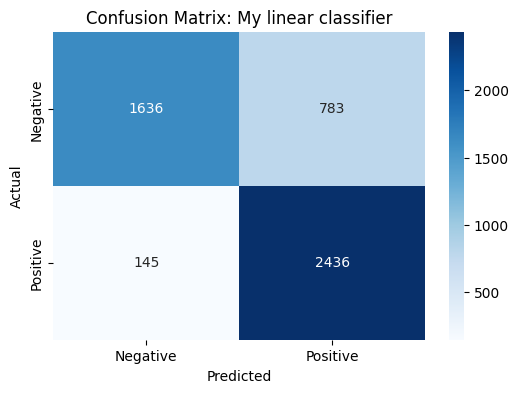

Модель: My logistic regression
Precision: 0.7568
Recall: 0.9438
F1-мерa: 0.8400
Accuracy: 0.8144
----------------------------------------


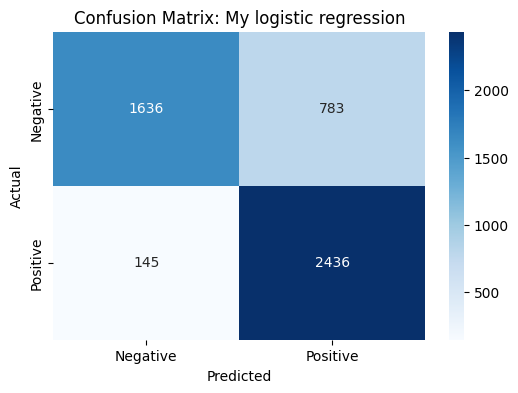

Модель: Logistic Regression sklearn
Precision: 0.9559
Recall: 0.8656
F1-мерa: 0.9085
Accuracy: 0.9100
----------------------------------------


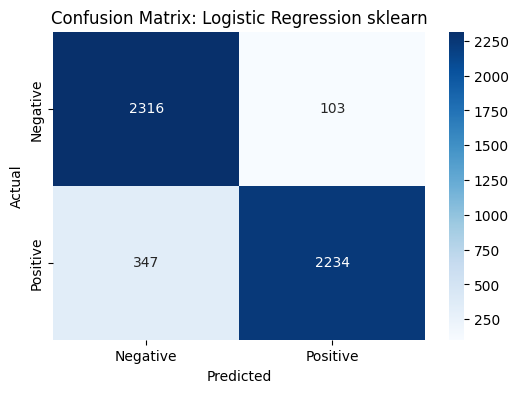

Модель: SVM sklearn
Precision: 0.9423
Recall: 0.8543
F1-мерa: 0.8962
Accuracy: 0.8978
----------------------------------------


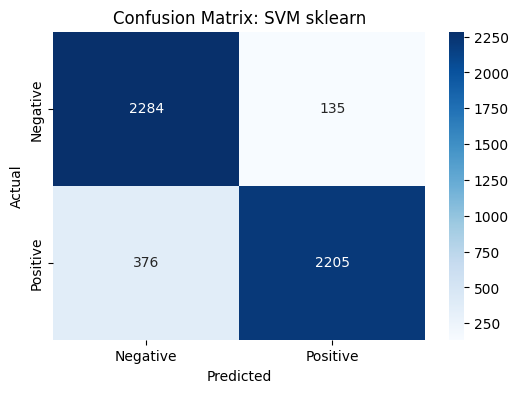

Модель: Decision Tree sklearn
Precision: 0.8951
Recall: 0.8962
F1-мерa: 0.8956
Accuracy: 0.8922
----------------------------------------


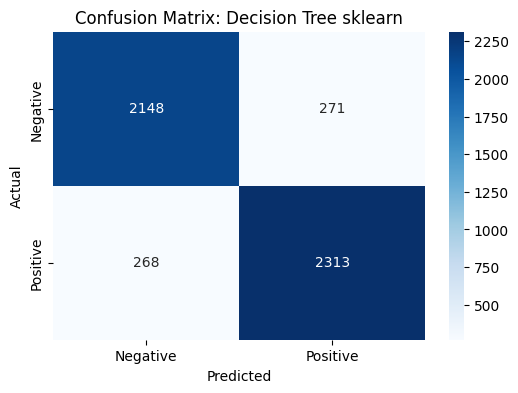

Модель: Random Forest
Precision: 0.9259
Recall: 0.9299
F1-мерa: 0.9279
Accuracy: 0.9254
----------------------------------------


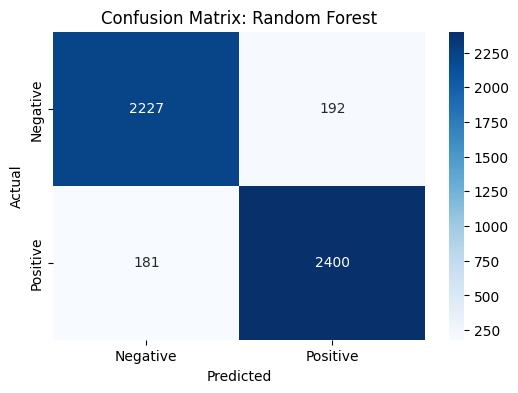

Модель: Gradient Boosting sklearn
Precision: 0.9273
Recall: 0.9345
F1-мерa: 0.9309
Accuracy: 0.9284
----------------------------------------


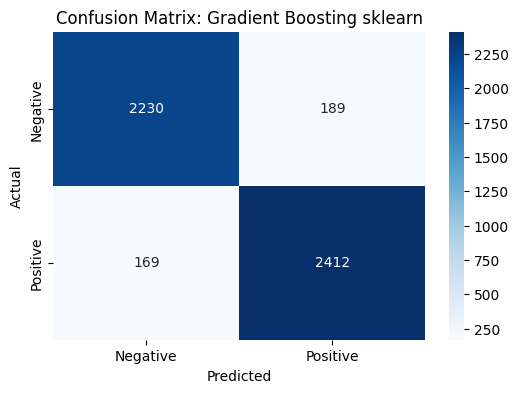

Модель: LightGBM
Precision: 0.9291
Recall: 0.9345
F1-мерa: 0.9318
Accuracy: 0.9294
----------------------------------------


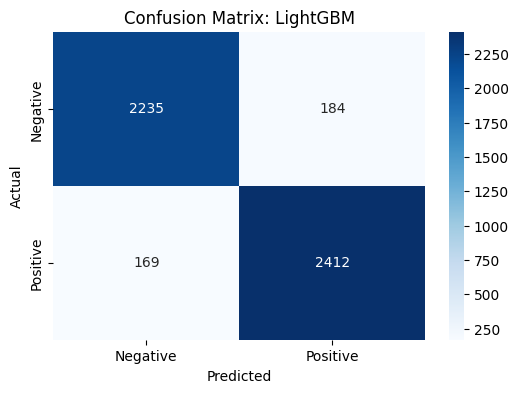

Модель: XGBoost
Precision: 0.9284
Recall: 0.9345
F1-мерa: 0.9315
Accuracy: 0.9290
----------------------------------------


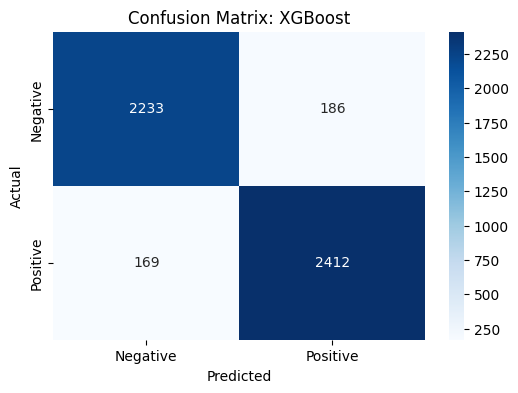

Модель: catboost
Precision: 0.9307
Recall: 0.9368
F1-мерa: 0.9338
Accuracy: 0.9314
----------------------------------------


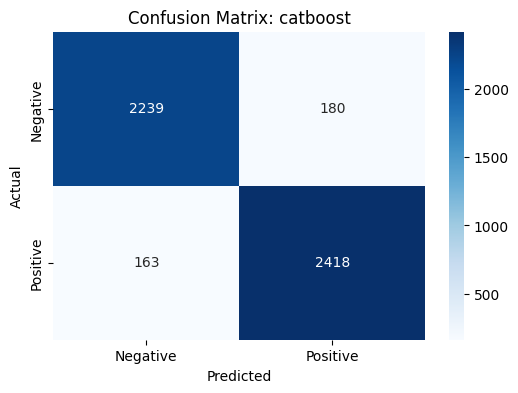

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Подсчет метрик для каждой модели
for name, y_pred in answer.items():
    print(f"Модель: {name}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-мерa: {f1_score(y_test, y_pred):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("-" * 40)

    # Построение confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


**Покажем наилучшие модели**

In [94]:
metrics_dict = {}
for name, y_pred in answer.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_dict[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df_sorted = metrics_df.sort_values(by='Accuracy', ascending=False)
print("Summary of Model Results:")
print(metrics_df_sorted)

Summary of Model Results:
                             Accuracy  Precision    Recall  F1 Score
catboost                       0.9314   0.930716  0.936846  0.933771
LightGBM                       0.9294   0.929122  0.934522  0.931814
XGBoost                        0.9290   0.928406  0.934522  0.931454
Gradient Boosting sklearn      0.9284   0.927336  0.934522  0.930915
Random Forest                  0.9254   0.925926  0.929872  0.927895
Logistic Regression sklearn    0.9100   0.955926  0.865556  0.908499
SVM sklearn                    0.8978   0.942308  0.854320  0.896159
Decision Tree sklearn          0.8922   0.895124  0.896164  0.895644
My linear classifier           0.8144   0.756757  0.943820  0.840000
My logistic regression         0.8144   0.756757  0.943820  0.840000


На основе результатов можно выделить, что модели catboost, LightGBM и XGBoost показали наилучшие результаты с точностью более 92%. Модель catboost лидирует по всем метрикам, включая точность, Precision и Recall, что делает её наиболее сбалансированной. Модели, такие как Logistic Regression и SVM, имеют высокую точность, но их показатели по recall значительно ниже. Мои модели показали наихудшие результаты, так как они слишком их ограниченны для данной задачи. Мне кажется, что метрика F1 Score является наиболее информативной, так как она учитывает как точность, так и полноту предсказаний. В целом можно сказать, что линейные модели не справляются с данной задачей, что подтверждается их низкой производительностью. Для улучшения результатов следует использовать более сложные алгоритмы. Я буду рекомендовать выбрать модель catboost для дальнейшего использования.